In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import re
import numpy as np
import pickle
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from geopy.exc import GeocoderUnavailable
from time import sleep

##### reading in data 

In [2]:
yr2023 = pd.read_csv('C:/Users/madel/Documents/CRIME/fortwayne2023.csv')
yr2023.head(6)                     

,Incident number,Incident nature,Area location code,Incident address,When reported,Occurred after,Occurred before,City,Offense code,Offense code.1,Offense code.2,Disposition
0,23F000001,113 SHOTS FIRED,F11A5,1945 GRISWOLD DR,1/1/2023 0:01,1/1/2023 0:00,1/1/2023 0:00,FORT WAYNE,113,,,UNF
1,23F000003,113 SHOTS FIRED,F41B5,WINTER ST & E LEWIS ST,1/1/2023 0:02,1/1/2023 0:02,1/1/2023 0:02,FORT WAYNE,113,,,INA
2,23F000004,"43,62",F1643,2737 W WASHINGTON CENTER RD,1/1/2023 0:06,1/1/2023 0:05,1/1/2023 0:05,FORT WAYNE,DFCL,CDIS,,R
3,23F000005,113 SHOTS FIRED,F42A5,305 E DEWALD ST,1/1/2023 0:01,1/1/2023 0:00,1/1/2023 0:00,FORT WAYNE,113,,,INA
4,23F000006,48 SUSPICIOUS,F32D5,3410 S CALHOUN ST,1/1/2023 0:10,1/1/2023 0:08,1/1/2023 0:08,FORT WAYNE,48,,,INA
5,23F000007,70 FIRE,F23N1,7201 MIAHQUEAH Ct,1/1/2023 0:20,1/1/2023 0:18,1/1/2023 0:18,FORT WAYNE,70,,,INA


In [3]:
yr2023["Incident nature"].str.extract(r'(\d*)')

,0
0,113
1,113
2,43
3,113
4,48
...,...
154473,111
154474,111
154475,111
154476,48


##### determining violent/non violent crimes

In [4]:
yr2023["Incident nature #"] = yr2023["Incident nature"].str.extract(r'(\d*)')
yr2023["Incident nature"] = yr2023["Incident nature"].str.extract(r'([a-z|\s]+)', flags = re.IGNORECASE)
yr2023["Incident nature"].str.strip('\s')
yr2023.head()

,Incident number,Incident nature,Area location code,Incident address,When reported,Occurred after,Occurred before,City,Offense code,Offense code.1,Offense code.2,Disposition,Incident nature #
0,23F000001,SHOTS FIRED,F11A5,1945 GRISWOLD DR,1/1/2023 0:01,1/1/2023 0:00,1/1/2023 0:00,FORT WAYNE,113,,,UNF,113
1,23F000003,SHOTS FIRED,F41B5,WINTER ST & E LEWIS ST,1/1/2023 0:02,1/1/2023 0:02,1/1/2023 0:02,FORT WAYNE,113,,,INA,113
2,23F000004,,F1643,2737 W WASHINGTON CENTER RD,1/1/2023 0:06,1/1/2023 0:05,1/1/2023 0:05,FORT WAYNE,DFCL,CDIS,,R,43
3,23F000005,SHOTS FIRED,F42A5,305 E DEWALD ST,1/1/2023 0:01,1/1/2023 0:00,1/1/2023 0:00,FORT WAYNE,113,,,INA,113
4,23F000006,SUSPICIOUS,F32D5,3410 S CALHOUN ST,1/1/2023 0:10,1/1/2023 0:08,1/1/2023 0:08,FORT WAYNE,48,,,INA,48


In [5]:
#incident = list(yr2023["Incident nature"].unique())
#incident = [str(x).strip(' ') for x in incident]

In [6]:
#filename = 'C:/Users/madel/Documents/CRIME/incident_list.txt'
#with open(filename, 'w') as outfile:
#    for item in incident:
#        # write each item on a new line
#        outfile.write("%s\n" % item)

In [7]:
#non violent list: SUSPICIOUS, FIRE, VAND VEH, CUTTING, T SUICIDE THR, RAPE, FIGHT, THEFT, ARMED ROB,
#BATTERY, A SUICIDE ATT, MAN DOWN, BOMB THREAT, SHOOTING, PARTY ARMED, I INTRUSION, N CHILD NEGLE,
#MOLESTING, 
#idk list: " ", nan,
#PLACES (why????): GRABILL, WOODBURN, MONROEVILLE

#### nan values

In [8]:
yr2023.replace(r'^\s*$', np.nan, regex=True, inplace=True)
yr2023.head(6)

,Incident number,Incident nature,Area location code,Incident address,When reported,Occurred after,Occurred before,City,Offense code,Offense code.1,Offense code.2,Disposition,Incident nature #
0,23F000001,SHOTS FIRED,F11A5,1945 GRISWOLD DR,1/1/2023 0:01,1/1/2023 0:00,1/1/2023 0:00,FORT WAYNE,113,NaN,NaN,UNF,113
1,23F000003,SHOTS FIRED,F41B5,WINTER ST & E LEWIS ST,1/1/2023 0:02,1/1/2023 0:02,1/1/2023 0:02,FORT WAYNE,113,NaN,NaN,INA,113
2,23F000004,NaN,F1643,2737 W WASHINGTON CENTER RD,1/1/2023 0:06,1/1/2023 0:05,1/1/2023 0:05,FORT WAYNE,DFCL,CDIS,NaN,R,43
3,23F000005,SHOTS FIRED,F42A5,305 E DEWALD ST,1/1/2023 0:01,1/1/2023 0:00,1/1/2023 0:00,FORT WAYNE,113,NaN,NaN,INA,113
4,23F000006,SUSPICIOUS,F32D5,3410 S CALHOUN ST,1/1/2023 0:10,1/1/2023 0:08,1/1/2023 0:08,FORT WAYNE,48,NaN,NaN,INA,48
5,23F000007,FIRE,F23N1,7201 MIAHQUEAH Ct,1/1/2023 0:20,1/1/2023 0:18,1/1/2023 0:18,FORT WAYNE,70,NaN,NaN,INA,70


In [9]:
yr2023.isna().sum()

Incident number            0
Incident nature        17791
Area location code       844
Incident address         202
When reported              0
Occurred after             0
Occurred before            0
City                     286
Offense code            2547
Offense code.1        145360
Offense code.2        151993
Disposition              284
Incident nature #       2807
dtype: int64

In [10]:
len(yr2023[yr2023.City.isna() & yr2023["Incident address"].isna() & yr2023["Area location code"].isna()])

201

#### visualizations

In [11]:
#formatting addresses for nominatim program
#removing "& [address street name]" (not accepted format for nominatim)
yr2023["Incident address"] = yr2023["Incident address"].str.replace(r"& .*  ","",regex=True)
yr2023["Incident address"] = yr2023["Incident address"].str.strip() + " IN"
yr2023["Incident address"]

0                    1945 GRISWOLD DR IN
1                           WINTER ST IN
2         2737 W WASHINGTON CENTER RD IN
3                     305 E DEWALD ST IN
4                   3410 S CALHOUN ST IN
                       ...              
154473            3892 COBBLESTONE CV IN
154474                 3228 OLIVER ST IN
154475            444 W CREIGHTON AVE IN
154476              3112 PITTSBURG ST IN
154477               3430 RAYMOND AVE IN
Name: Incident address, Length: 154478, dtype: object

In [12]:
yr2023["Incident address"][1] = "E LEWIS ST IN"
yr2023["Incident address"][2] = "2737 WASHINGTON RD IN"
#removing apartment number (not accepted format for nominatim)
yr2023["Incident address"] = yr2023["Incident address"].str.replace(r"APT \d+([A-Z]+)? ","",regex=True)

In [13]:
#re.sub(r"APT \d+[A-Z]+","", "530 W BERRY ST APT 211 IN")
re.sub(r"APT \d+([A-Z]+)? ","", "530 W BERRY ST APT 211 IN")

'530 W BERRY ST IN'

In [14]:
yr2023["Incident address"][2036]

'530 W BERRY ST IN'

In [15]:
yr2023["Incident address"].str.replace("& .*", "", regex=True)

0            1945 GRISWOLD DR IN
1                  E LEWIS ST IN
2          2737 WASHINGTON RD IN
3             305 E DEWALD ST IN
4           3410 S CALHOUN ST IN
                   ...          
154473    3892 COBBLESTONE CV IN
154474         3228 OLIVER ST IN
154475    444 W CREIGHTON AVE IN
154476      3112 PITTSBURG ST IN
154477       3430 RAYMOND AVE IN
Name: Incident address, Length: 154478, dtype: object

In [16]:
addres = []
for ad in yr2023["Incident address"].str.split('&').str[0]:
    addres.append(ad)

In [17]:
yr2023["Incident address"] = addres

In [18]:
yr2023["& exists"] = yr2023["Incident address"].agg(lambda x: x.str.contains('&'))

In [19]:
yr2023["& exists"].value_counts()

& exists
False    154276
Name: count, dtype: int64

In [20]:
re.sub(r"& .*","", "S LAFAYETTE ST & 26 E RUDISILL BLVD IN")

'S LAFAYETTE ST '

In [21]:
#def do_geocode(address, geopy):
#    try:
#        return geopy.geocode(address)
#    except GeocoderTimedOut:
#        print("timeout reached")
#        sleep(1)
#        return do_geocode(address)

In [22]:
len(yr2023["Incident address"].str.strip().unique())

36092

In [23]:
lat = []
long = []
add_pickle = open("C:/Users/madel/Documents/CRIME/address_coors.pickle","rb")
add = pickle.load(add_pickle)
NoneType = type(None)
geopy = Nominatim(user_agent="emenma01@pfw.edu")
addresses = yr2023["Incident address"].str.strip().unique().tolist()
len(addresses)

36092

In [24]:
len(add)

1932

In [25]:
not_working = ["1 UNF IN", "3 TX IN", "303 NORTHEAST DR IN", "3801 COLDWATER RD IN", "5417 N STONY RUN LN IN", "3005 S HARRISON ST IN", "5459 N CLINTON ST IN", "2737 W WASHINGTON CENTER RD LOT 118 IN", "200 E BERRY ST IN"]

In [26]:
#geolocator = Nominatim(user_agent="emenma01@pfw.edu")
#yr2023["geocode"] = yr2023["Incident address"].apply(geolocator.geocode)
#yr2023["lat"] = location.latitude

for i in range(len(add), len(addresses)):
    address = addresses[i]
    if address in add:
        sleep(1)
    elif address in not_working:
        add[address] = (np.nan, np.nan)
        sleep(1)   
    else: 
        try: 
            coor = geopy.geocode(address)
            if type(coor) != NoneType:
                coor2 = (coor.latitude, coor.longitude)
                add[address] = coor2
            else:
                add[address] = (np.nan, np.nan)
        except GeocoderUnavailable:
            add[address] = (np.nan, np.nan)
        sleep(1)
#plotly.express

KeyboardInterrupt: 

In [27]:
len(add)

2712

In [28]:
addcoors = open('C:/Users/madel/Documents/CRIME/address_coors1.pickle', 'wb')
pickle.dump(add, addcoors)
addcoors.close()

In [ ]:
coor = geopy.geocode("1945 GRISWOLD DR IN")
coor2 = (coor.latitude, coor.longitude)
add2 = {}
add2.update({'1945 GRISWOLD DR IN': coor2})
add2

{'1945 GRISWOLD DR IN': (41.0928334, -85.132773)}

In [ ]:
add2.get('1945 GRISWOLD DR IN')[0]

41.0928334

In [ ]:
occur = []
for i in range(1,13):
    occur.append(yr2023["When reported"].str.contains(fr'^{i}').sum())

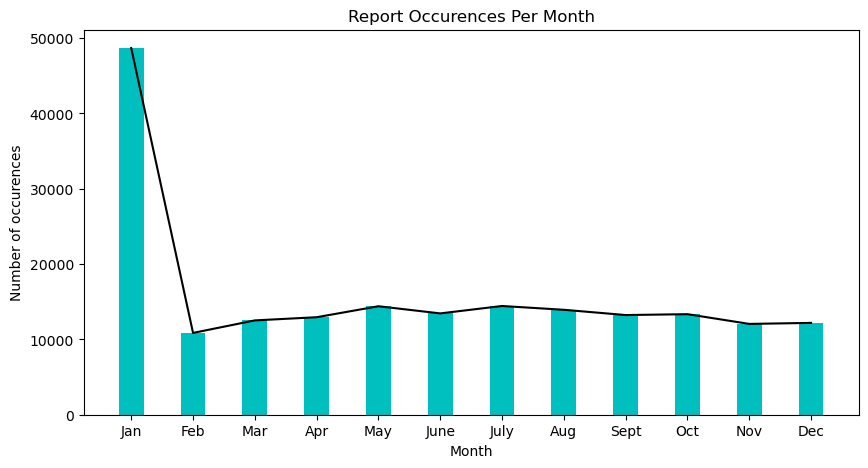

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept",
          "Oct", "Nov", "Dec"]
fig = plt.figure(figsize = (10, 5))
plt.bar(months, occur, color ='c', width = 0.4)
plt.xlabel("Month")
plt.ylabel("Number of occurences")
plt.title("Report Occurences Per Month")

plt.plot(months, occur, color='k')

plt.show()